# please uncomment pip intallation commands once your on binder

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.graph_objs import Scatter
import plotly.io as pio

## extracting datasets
### df is for qualy dataset
### dfsp is for races (sprints)

In [3]:
df = pd.read_csv('./f1/f1db_csv/quali.csv') 
dfsp=pd.read_csv('./f1/f1db_csv/sprint.csv')

## sample of the qualy dataset 

In [4]:
print (df)
df.head()

       forename     surname number                   name        date  \
0         Lewis    Hamilton     44  Australian Grand Prix  2008-03-16   
1        Robert      Kubica     88  Australian Grand Prix  2008-03-16   
2        Heikki  Kovalainen     \N  Australian Grand Prix  2008-03-16   
3        Felipe       Massa     19  Australian Grand Prix  2008-03-16   
4          Nick    Heidfeld     \N  Australian Grand Prix  2008-03-16   
...         ...         ...    ...                    ...         ...   
9570      Kevin   Magnussen     20   Abu Dhabi Grand Prix  2022-11-20   
9571     Pierre       Gasly     10   Abu Dhabi Grand Prix  2022-11-20   
9572   Valtteri      Bottas     77   Abu Dhabi Grand Prix  2022-11-20   
9573  Alexander       Albon     23   Abu Dhabi Grand Prix  2022-11-20   
9574   Nicholas      Latifi      6   Abu Dhabi Grand Prix  2022-11-20   

      position        q1        q2        q3  
0            1  1:26.572  1:25.187  1:26.714  
1            2  1:26.103  1:2

,forename,surname,number,name,date,position,q1,q2,q3
0,Lewis,Hamilton,44,Australian Grand Prix,2008-03-16,1,1:26.572,1:25.187,1:26.714
1,Robert,Kubica,88,Australian Grand Prix,2008-03-16,2,1:26.103,1:25.315,1:26.869
2,Heikki,Kovalainen,\N,Australian Grand Prix,2008-03-16,3,1:25.664,1:25.452,1:27.079
3,Felipe,Massa,19,Australian Grand Prix,2008-03-16,4,1:25.994,1:25.691,1:27.178
4,Nick,Heidfeld,\N,Australian Grand Prix,2008-03-16,5,1:25.960,1:25.518,1:27.236


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   forename  9575 non-null   object
 1   surname   9575 non-null   object
 2   number    9575 non-null   object
 3   name      9575 non-null   object
 4   date      9575 non-null   object
 5   position  9575 non-null   int64 
 6   q1        9567 non-null   object
 7   q2        9424 non-null   object
 8   q3        9276 non-null   object
dtypes: int64(1), object(8)
memory usage: 673.4+ KB


In [6]:
dfs=df.sort_values(by=['date'])

## converting to appropriate types and extracting new column year

In [7]:
dfs=dfs.convert_dtypes()
dfs.info()
dfs['year'] = [m[:4] for m in dfs['date']]
print(dfs)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9575 entries, 2610 to 9574
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   forename  9575 non-null   string
 1   surname   9575 non-null   string
 2   number    9575 non-null   string
 3   name      9575 non-null   string
 4   date      9575 non-null   string
 5   position  9575 non-null   Int64 
 6   q1        9567 non-null   string
 7   q2        9424 non-null   string
 8   q3        9276 non-null   string
dtypes: Int64(1), string(8)
memory usage: 757.4 KB
       forename     surname number                  name        date  \
2610    Olivier       Panis     \N  Brazilian Grand Prix  1994-03-27   
2617      David     Brabham     \N  Brazilian Grand Prix  1994-03-27   
2616   Bertrand      Gachot     \N  Brazilian Grand Prix  1994-03-27   
2615      Pedro        Lamy     \N  Brazilian Grand Prix  1994-03-27   
2614    Olivier     Beretta     \N  Brazilian Grand Prix  1994

## getting all the pole sitters for each year since 1994

In [8]:
poles = dfs[dfs['position']==1]
poles = poles.groupby([dfs['forename'],dfs['surname']])['position'].count().reset_index(name='poles')
print(poles)
poles.info()

        forename        surname  poles
0         Ayrton          Senna      3
1         Carlos          Sainz      2
2        Charles        Leclerc     17
3          Damon           Hill     13
4         Daniel      Ricciardo      3
5          David      Coulthard      6
6         Felipe          Massa     16
7       Fernando         Alonso     23
8         George        Russell      1
9        Gerhard         Berger      4
10     Giancarlo     Fisichella      4
11        Heikki     Kovalainen      1
12  Heinz-Harald       Frentzen      1
13       Jacques     Villeneuve      7
14         Jarno         Trulli      4
15          Jean          Alesi      1
16        Jenson         Button      8
17          Juan  Pablo Montoya      2
18         Kevin      Magnussen      1
19          Kimi      Räikkönen     19
20         Lance         Stroll      1
21         Lando         Norris      1
22         Lewis       Hamilton    106
23          Mark         Webber     12
24           Max     Vers

## setting the top 10 poles sitters overall 

In [9]:
top10 = poles.sort_values(by=['poles']).tail(11)  
print(top10)

     forename     surname  poles
3       Damon        Hill     13
6      Felipe       Massa     16
2     Charles     Leclerc     17
36   Valtteri      Bottas     19
19       Kimi   Räikkönen     19
24        Max  Verstappen     20
7    Fernando      Alonso     23
29       Nico     Rosberg     30
25    Michael  Schumacher     36
34  Sebastian      Vettel     57
22      Lewis    Hamilton    106


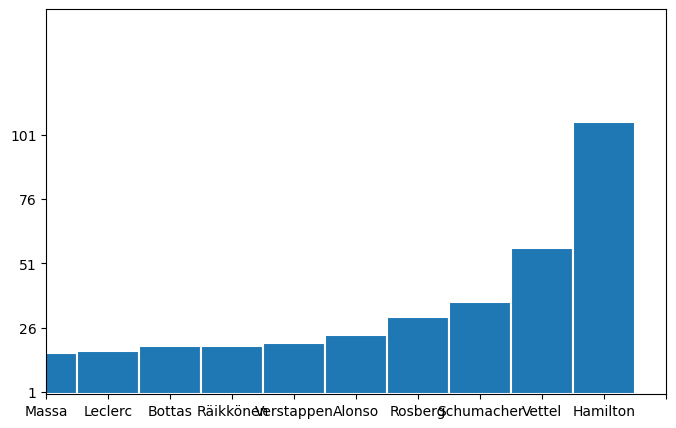

In [10]:

# plt.style.use('_mpl-gallery')
plt.rcParams["figure.figsize"] = (8,5)
# plt.xlabel('xlabel', fontsize=18)

x = top10['surname']
y = top10['poles']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=1.5)

ax.set(xlim=(1, 11), xticks=np.arange(1, 12),
       ylim=(0, 150), yticks=np.arange(1, 105,25))

plt.show()

## adding another column to plot pole positin consistancy

In [11]:
poles = dfs[dfs['position']==1]
poles = poles.groupby([dfs['forename'],dfs['surname'],dfs['year'].astype('int32')])['position'].count().reset_index(name='poles')
poles



,forename,surname,year,poles
0,Ayrton,Senna,1994,3
1,Carlos,Sainz,2022,2
2,Charles,Leclerc,2019,6
3,Charles,Leclerc,2021,2
4,Charles,Leclerc,2022,9
...,...,...,...,...
125,Valtteri,Bottas,2017,4
126,Valtteri,Bottas,2018,2
127,Valtteri,Bottas,2019,5
128,Valtteri,Bottas,2020,5


In [12]:

dfp=poles.query('year == year').sort_values(by='year')
dfp.sort_values(by='poles')

,forename,surname,year,poles
32,Heikki,Kovalainen,2008,1
76,Mark,Webber,2012,1
49,Kimi,Räikkönen,2004,1
106,Ralf,Schumacher,2004,1
93,Michael,Schumacher,2012,1
...,...,...,...,...
66,Lewis,Hamilton,2015,11
68,Lewis,Hamilton,2017,11
101,Nico,Rosberg,2014,11
67,Lewis,Hamilton,2016,12


In [13]:

plt.style.use('_mpl-gallery')
plt.rcParams["figure.figsize"] = (8,5)

x = dfp.loc[dfp['surname']=='Hamilton']['year']
y = dfp.loc[dfp['surname']=='Hamilton']['poles']

# ax1 = dfl.plot.scatter(x='year',y='poles',c='DarkBlue')
# axl =dfv.plot.scatter(x='year',y='poles',c='red')
fig = dict({
    "data": [{"type": "scatter",
              "x": x,
              "y": y},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Vettel']['year'],
              "y": dfp.loc[dfp['surname']=='Vettel']['poles']},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Bottas']['year'],
              "y": dfp.loc[dfp['surname']=='Bottas']['poles']},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Rosberg']['year'],
              "y": dfp.loc[dfp['surname']=='Rosberg']['poles']},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Schumacher']['year'],
              "y": dfp.loc[dfp['surname']=='Schumacher']['poles']},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Verstappen']['year'],
              "y": dfp.loc[dfp['surname']=='Verstappen']['poles']},
              {"type": "scatter",
              "x": dfp.loc[dfp['surname']=='Leclerc']['year'],
              "y": dfp.loc[dfp['surname']=='Leclerc']['poles']}],
    "layout": {"title": {"text": "comparison between Hamilton and other drivers"},
                "xaxis_fixedrange": True,
                "yaxis_fixedrange": True}
    })
pio.show(fig)


In [147]:
dfsp.tail(82).head(22)


,forename,surname,number,name,date,positionOrder,grid,rank
25758,Carlos,Sainz,55,Japanese Grand Prix,2022-10-09,19,3,0
25751,Lance,Stroll,18,Japanese Grand Prix,2022-10-09,12,19,5
25769,Yuki,Tsunoda,22,United States Grand Prix,2022-10-23,10,19,6
25767,Sebastian,Vettel,5,United States Grand Prix,2022-10-23,8,10,16
25766,Fernando,Alonso,14,United States Grand Prix,2022-10-23,7,14,8
25765,Lando,Norris,4,United States Grand Prix,2022-10-23,6,6,7
25760,Max,Verstappen,33,United States Grand Prix,2022-10-23,1,2,2
25763,Sergio,Pérez,11,United States Grand Prix,2022-10-23,4,9,3
25762,Charles,Leclerc,16,United States Grand Prix,2022-10-23,3,12,4
25761,Lewis,Hamilton,44,United States Grand Prix,2022-10-23,2,3,5


In [148]:
dfsp=dfsp.sort_values(by=['date'])
dfsp=dfsp.convert_dtypes()
dfsp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 20034 to 25839
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   forename       25840 non-null  string
 1   surname        25840 non-null  string
 2   number         25840 non-null  string
 3   name           25840 non-null  string
 4   date           25840 non-null  string
 5   positionOrder  25840 non-null  Int64 
 6   grid           25840 non-null  Int64 
 7   rank           25840 non-null  string
dtypes: Int64(2), string(6)
memory usage: 1.8 MB


## getting the winners list overall and per season

In [166]:
wins = dfsp[dfsp['positionOrder']==1]
wins['year'] = [m[:4] for m in wins['date']]
winst = wins.groupby([wins['forename'],wins['surname']])['positionOrder'].count().reset_index(name='wins')
wins = wins.groupby([wins['forename'],wins['surname'],wins['year'].astype('int32')])['positionOrder'].count().reset_index(name='wins')

/tmp/ipykernel_30717/1471719717.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [167]:
winst=winst.sort_values(by='wins')
top10f=winst.tail(10)


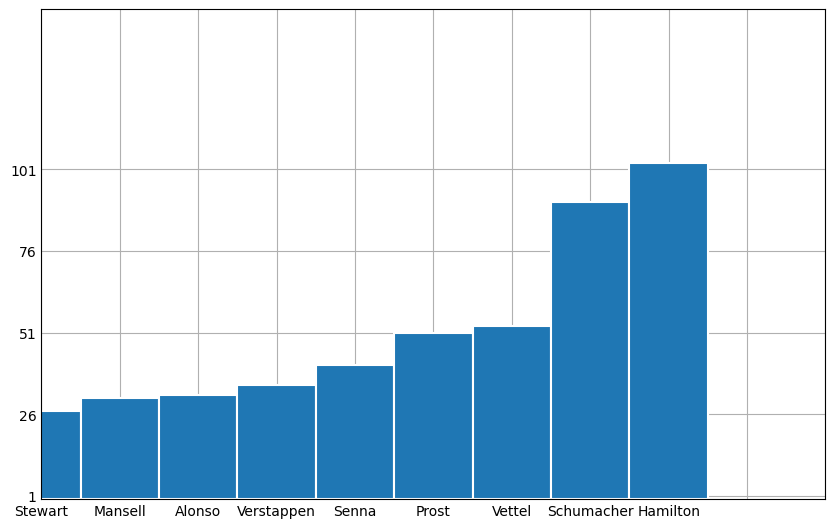

In [157]:
# plt.style.use('_mpl-gallery')
plt.rcParams["figure.figsize"] = (8,5)
# plt.xlabel('xlabel', fontsize=18)

x = top10f['surname']
y = top10f['wins']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=1.5)

ax.set(xlim=(1, 11), xticks=np.arange(1, 12),
       ylim=(0, 150), yticks=np.arange(1, 105,25))

plt.show()

In [158]:
plt.style.use('_mpl-gallery')
plt.rcParams["figure.figsize"] = (8,5)

x = wins.loc[wins['surname']=='Hamilton']['year']
y = wins.loc[wins['surname']=='Hamilton']['wins']

# ax1 = dfl.plot.scatter(x='year',y='wins',c='DarkBlue')
# axl =dfv.plot.scatter(x='year',y='wins',c='red')
fig = dict({
    "data": [{"type": "scatter",
              "x": x,
              "y": y},
              {"type": "scatter",
              "x": wins.loc[wins['surname']=='Vettel']['year'],
              "y": wins.loc[wins['surname']=='Vettel']['wins']},
              {"type": "scatter",
              "x": wins.loc[wins['surname']=='Prost']['year'],
              "y": wins.loc[wins['surname']=='Prost']['wins']},
              {"type": "scatter",
              "x": wins.loc[wins['forename']=='Nico']['year'],
              "y": wins.loc[wins['forename']=='Nico']['wins']},
              {"type": "scatter",
              "x": wins.loc[wins['surname']=='Schumacher']['year'][:15],
              "y": wins.loc[wins['surname']=='Schumacher']['wins'][:15]},
              {"type": "scatter",
              "x": wins.loc[wins['surname']=='Verstappen']['year'],
              "y": wins.loc[wins['surname']=='Verstappen']['wins']},
              {"type": "scatter",
              "x": wins.loc[wins['forename']=='Ayrton']['year'],
              "y": wins.loc[wins['forename']=='Ayrton']['wins']}],
    "layout": {"title": {"text": "comparison between Hamilton and other drivers"},
                "xaxis_fixedrange": True,
                "yaxis_fixedrange": True}
    })
pio.show(fig)